In [2]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name

    def getName(self):
        return self.name

    def __str__(self):
        return self.name


class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest

    def getSource(self):
        return self.src

    def getDestination(self):
        return self.dest

    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()



In [3]:
class Digraph(object):
    """edges is a dict mapping each node to a list of its children"""

    def __init__(self):
        self.edges = {}

    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []

    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)

    def childrenOf(self, node):
        return self.edges[node]

    def hasNode(self, node):
        return node in self.edges

    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)

    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->' + dest.getName() + '\n'
        return result[:-1]  # Exclude the final newline character

    def printAdjacencyList(self):
        for node in self.edges:
            children = self.childrenOf(node)
            children_names = [child.getName() for child in children]
            print(f"{node.getName()}: {', '.join(children_names)}")




In [4]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)


In [5]:
def buildCityGraph(graphType):
    g = graphType()
    # Create 7 nodes
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        g.addNode(Node(name))
    
    # Add edges between nodes
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    
    return g


In [46]:
## test Depth first search DFS

def DFS(graph, start, end, path, shortest, toPrint=False):
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path:  # avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest, toPrint) ## this will only have a path if start == end, we reached end node
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

def shortestPath(graph, start, end, toPrint=True):
    return DFS(graph, start, end, [], None, toPrint)

def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result


def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination), toPrint=True)
    
    if sp is not None:
        print('Shortest path from', source, 'to', destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)



In [49]:
testSP('Chicago', 'Boston')
print()
testSP('Boston','Chicago')
print()
testSP('Boston', 'Phoenix')


Current DFS path: Chicago
Current DFS path: Chicago->Denver
Current DFS path: Chicago->Denver->Phoenix
Current DFS path: Chicago->Denver->New York
Already visited Chicago
Current DFS path: Chicago->Phoenix
There is no path from Chicago to Boston

Current DFS path: Boston
Current DFS path: Boston->Providence
Already visited Boston
Current DFS path: Boston->Providence->New York
Current DFS path: Boston->Providence->New York->Chicago
Current DFS path: Boston->New York
Current DFS path: Boston->New York->Chicago
Shortest path from Boston to Chicago is Boston->New York->Chicago

Current DFS path: Boston
Current DFS path: Boston->Providence
Already visited Boston
Current DFS path: Boston->Providence->New York
Current DFS path: Boston->Providence->New York->Chicago
Current DFS path: Boston->Providence->New York->Chicago->Denver
Current DFS path: Boston->Providence->New York->Chicago->Denver->Phoenix
Already visited New York
Current DFS path: Boston->Providence->New York->Chicago->Phoenix
Curr

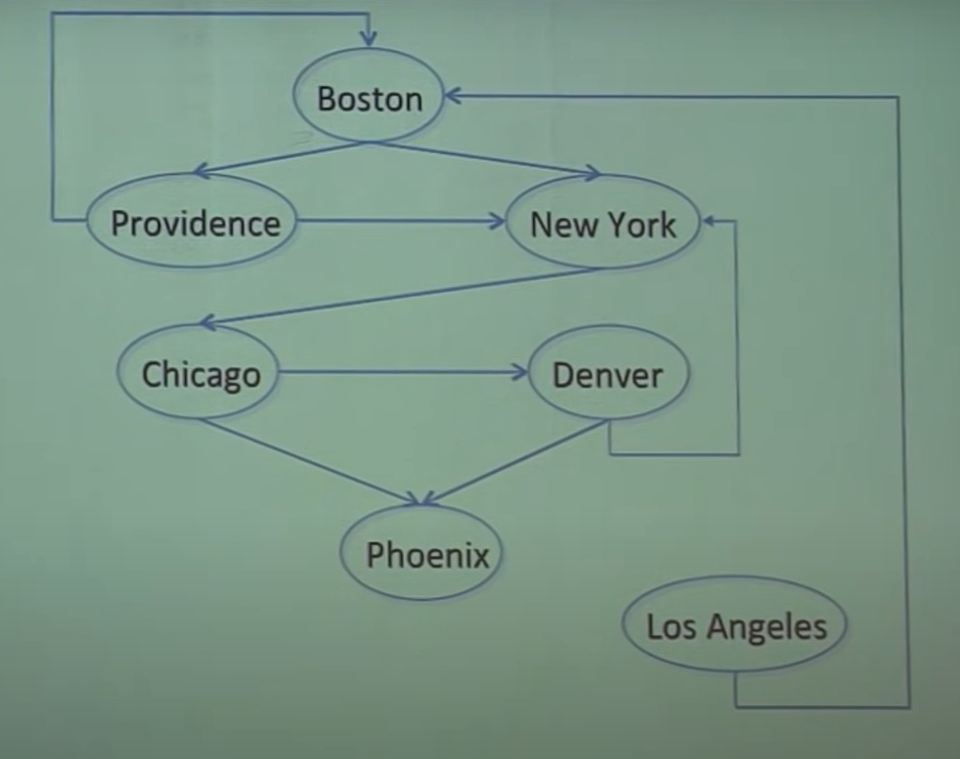

In [56]:
"""
The BFS (Breadth-First Search) implementation uses a queue to explore paths from the start node,
extending them one edge at a time. If a path reaches the end node, it's returned as the shortest path.
Throughout the process, paths are built incrementally, and the search ensures it does not revisit nodes,
effectively avoiding cycles.
"""


def BFS(graph, start, end, toPrint=False):
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        # Get and remove the oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:  # avoid cycles
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None


def shortestPath(graph, start, end, toPrint=False, method=BFS):
    """Assumes graph is a Digraph; start and end are nodes
    Returns a shortest path from start to end"""
    return method(graph, start, end, toPrint)

# Example call to shortestPath
testSP('Boston', 'Phoenix')
print()
testSP('Boston', 'Los Angeles')
print()
testSP('Boston', 'New York')


Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Phoenix

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Phoenix
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Phoenix
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Current BFS path: Boston->Providence